Dataset Link: [São Paulo Properties April 2019](https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)

### 0. Import libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

px.set_mapbox_access_token(open('datasets/mapbox_token.txt').read())

### 1. Uploading data file

In [2]:
df = pd.read_csv('datasets/sao-paulo-properties-april-2019.csv')
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


### 2. Understanding data

In [3]:
df_rent = df[df['Negotiation Type']=='rent']
df_sale = df[df['Negotiation Type']=='sale']

In [4]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

All data seems to be formated correctly

In [5]:
fig = px.scatter_mapbox(
    df_rent, 
    lat='Latitude', 
    lon='Longitude', 
    color='Price', 
    size='Size',
    color_continuous_scale=px.colors.cyclical.IceFire, 
    size_max=15, 
    zoom=10, 
    opacity=0.4
)

fig.update_coloraxes(
    colorscale = [
        [0, 'rgb(166,206,227, 0.5)'],
        [0.02, 'rgb(31,120,180,0.5)'],
        [0.05, 'rgb(178,223,138,0.5)'],
        [0.10, 'rgb(51,160,44,0.5)'],
        [0.15, 'rgb(251,154,153,0.5)'],
        [1, 'rgb(227,26,28,0.5)']
    ]
)

fig.update_layout(
    height=800, 
    mapbox=dict(
        center=go.layout.mapbox.Center(
            lat=-23.543138, 
            lon=-46.69486
        )
    )
)

fig.show()

Here it's possible to see the rent price distribution, with red marks as the expensive properties

In [6]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

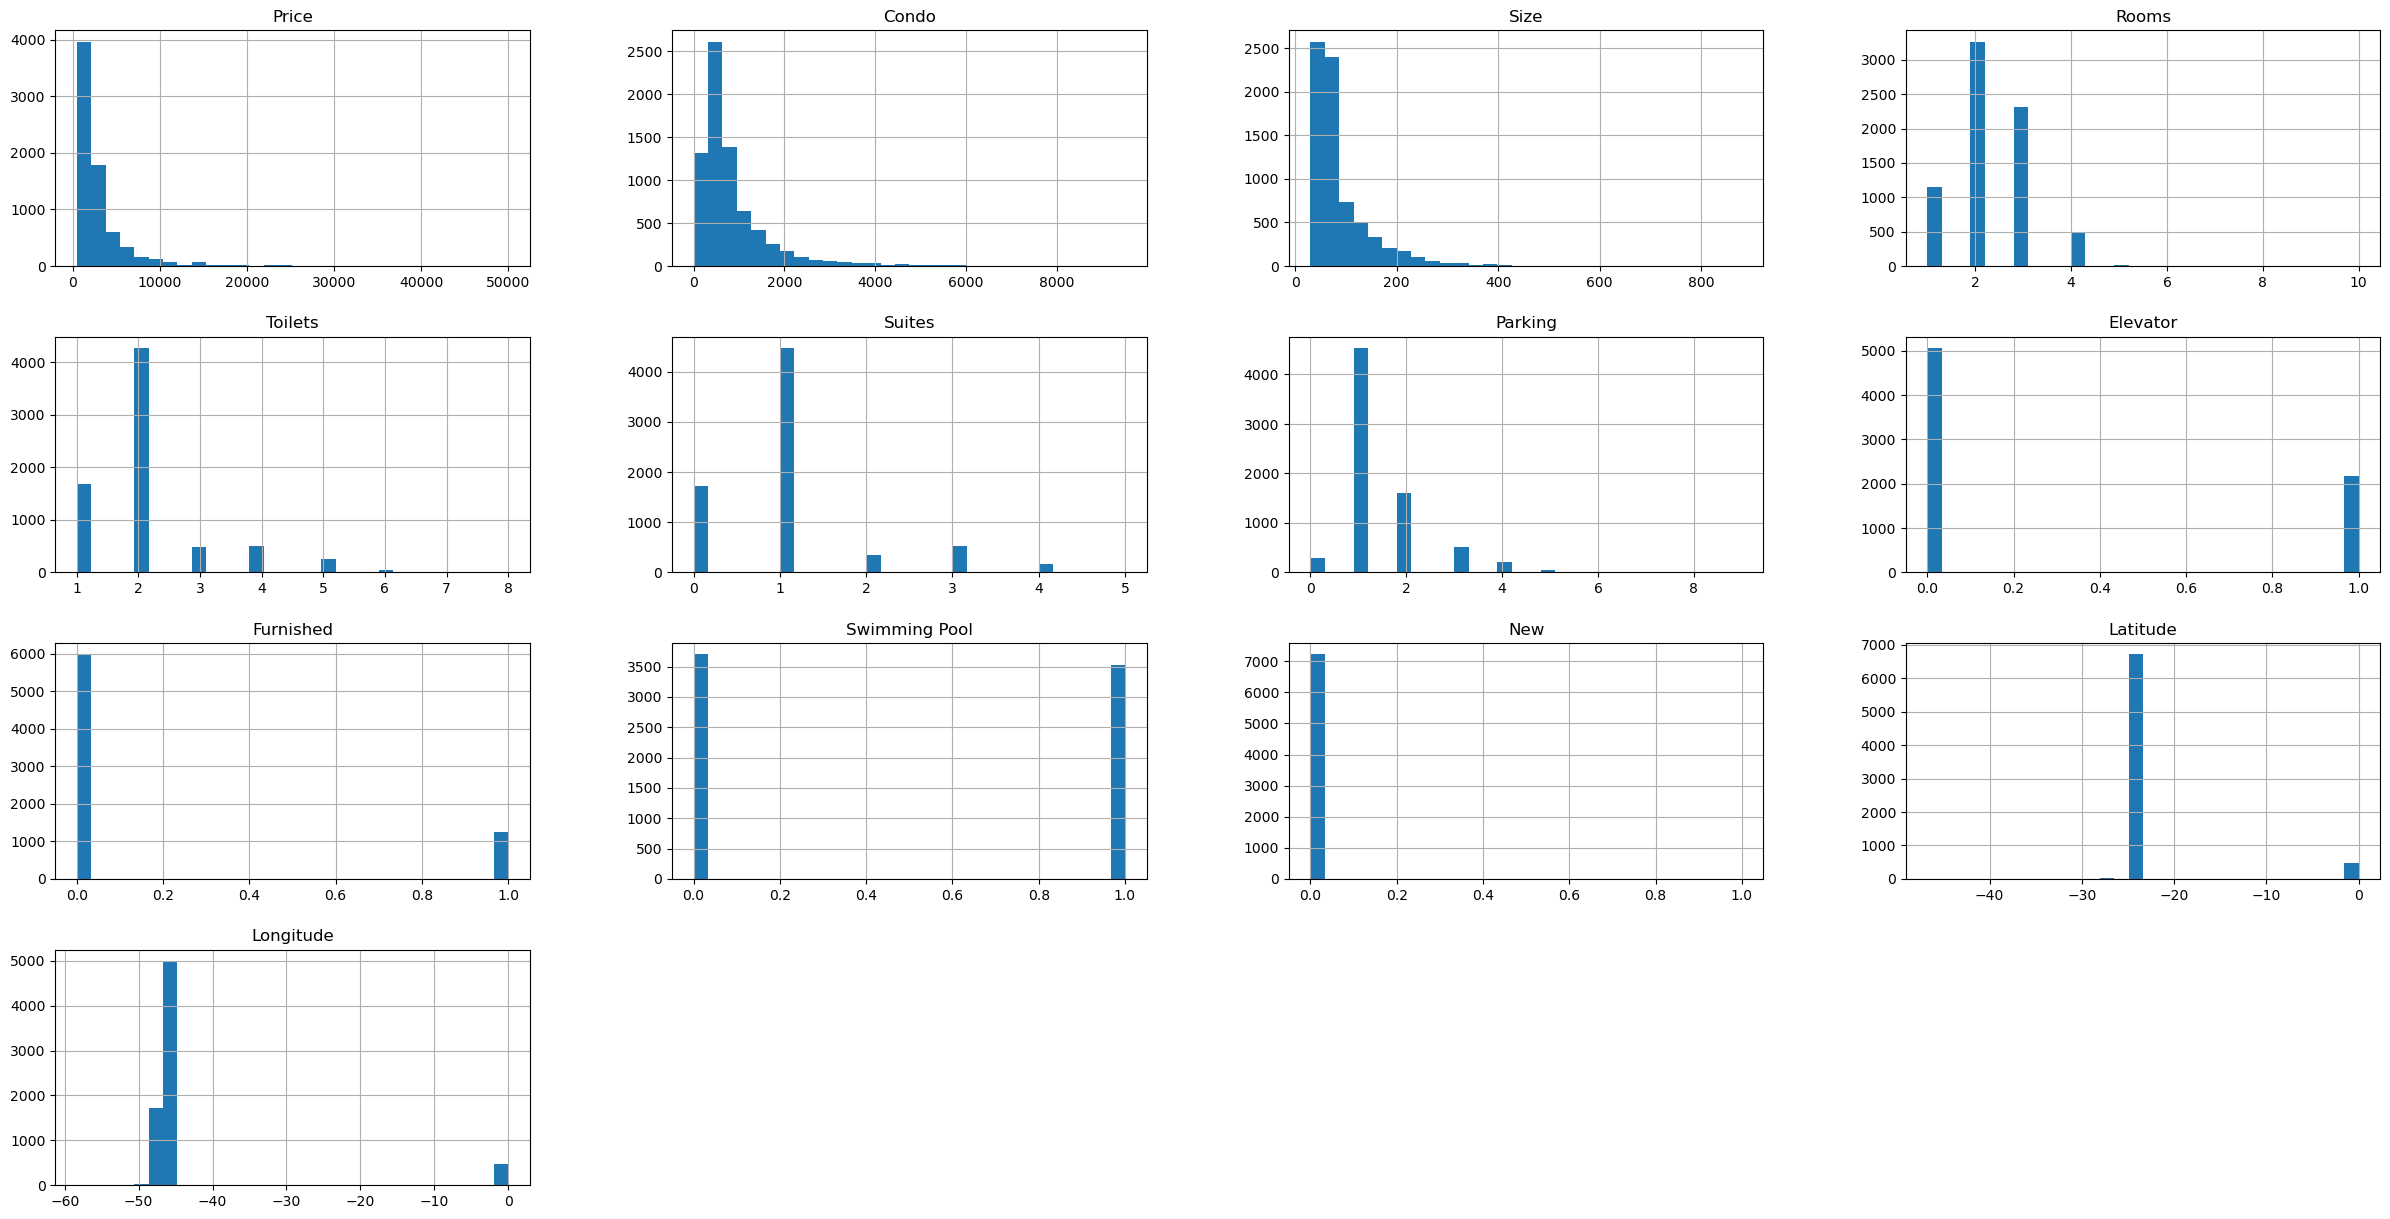

In [7]:
df_rent.hist(
    bins=30, 
    figsize=(30, 15)
)

Since we're using df_rent, there isn't a new apartment, so this column will be useless during ML process

In [8]:
df_rent['Property Type'].value_counts()

Property Type
apartment    7228
Name: count, dtype: int64

Again, there is just "apartment" type, another useless column

In [9]:
df_rent['District'].value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [10]:
df_rent_filtered = df_rent.drop(
    columns=[
        'District',
        'Negotiation Type',
        'Property Type'
    ]
)

df_rent_filtered.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

### 3. Preparing data to use in ML

#### Excluding useless data

In [11]:
df_cleaned = df_rent.drop(
    columns=[
        'New', 
        'Property Type', 
        'Negotiation Type'
    ]
)

df_cleaned.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


#### Preprocessing step

The District column is a str column (cateogrical data)  
To do the ML process, we need to convert it to a number  
Below there are two eays to do this process

##### Ordinal Encoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(df_cleaned[['District']])
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

Since we have a lot of Districts, Ordinal Encoder isn't the best way to do this step  
The ML could think the order may have some importance in the price, but it doesn't

##### One Hot Encoder

One Hot Encoder will transform each unique value in District column into one column  
This way we will have a sparse matrix, with District name in columns and a lot of 0 and 1 in lines  
Where 1 represents that the line is in the determinated District and 0 it is not

In [13]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[['District']])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [14]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
housing_cat_1hot.toarray().shape

(7228, 94)

7228 lines and 94 columns (Districts)

In [16]:
cat_encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

In [17]:
one_hot = pd.get_dummies(df_cleaned['District'])

df = df_cleaned.drop(columns='District')
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


Here is the final df, ready to implement the ML process

### 4. Training ML Process

#### Dividing df into Target (Y) and Features (X)

In [18]:
from sklearn.model_selection import train_test_split

Y = df['Price']
X = df.loc[:, df.columns != 'Price']

X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,False,False,False,False,False,False,False,False,False,False
1,148,45,2,2,1,1,0,0,0,-23.550239,...,False,False,False,False,False,False,False,False,False,False
2,100,48,2,2,1,1,0,0,0,-23.542818,...,False,False,False,False,False,False,False,False,False,False
3,200,48,2,2,1,1,0,0,0,-23.547171,...,False,False,False,False,False,False,False,False,False,False
4,410,55,2,2,1,1,1,0,0,-23.525025,...,False,False,False,False,False,False,False,False,False,False


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]

print(f'Predictions: {lin_reg.predict(some_data)}')
print(f'Labels: {list(some_labels)}')

Predictions: [ 911.47875977  838.43383789  904.38598633  932.1953125  1140.10229492]
Labels: [930, 1000, 1000, 1000, 1300]


In [22]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1839.8514108050836

Here it's with a huge error, doesn't seems to be a good model for this prediction

#### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

22.022504742199775

In [25]:
df_scores = pd.DataFrame()

df_scores.loc['lin_reg', 'rmse'] = lin_rmse
df_scores.loc['tree_reg', 'rmse'] = tree_rmse

df_scores

,rmse
lin_reg,1839.851411
tree_reg,22.022505


Decision Tree is with a lower error, but it could be overfitted since it's still using "train" data

#### Validating results using Cross Validation

Cross Val will divide the df in 'cv' quanitity (in this case 10)  
And will use 9 of 10 parts to train the model and 1 of 10 to test  
This way we can see how the ML model will be usefull with data that it didn't saw yet

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    lin_reg, 
    x_train, 
    y_train,
    scoring='neg_mean_squared_error', 
    cv=10
)

lin_rmse_scores = np.sqrt(-scores)

In [27]:
df_scores.loc['lin_reg', 'mean'] = lin_rmse_scores.mean()
df_scores.loc['lin_reg', 'std'] = lin_rmse_scores.std()

df_scores

,rmse,mean,std
lin_reg,1839.851411,1866.03893,180.948837
tree_reg,22.022505,NaN,NaN


In [28]:
scores = cross_val_score(
    tree_reg, 
    x_train, 
    y_train,
    scoring='neg_mean_squared_error', 
    cv=10
)

tree_rmse_scores = np.sqrt(-scores)

In [29]:
df_scores.loc['tree_reg', 'mean'] = tree_rmse_scores.mean()
df_scores.loc['tree_reg', 'std'] = tree_rmse_scores.std()

df_scores

,rmse,mean,std
lin_reg,1839.851411,1866.038930,180.948837
tree_reg,22.022505,2459.410291,309.190778


At first time we tought Linear Regresion was worse  
But here the opposite is clear since it have a lower mean and std

#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

673.5709220593999

In [32]:
df_scores.loc['rf_reg', 'rmse'] = rf_rmse

In [33]:
scores = cross_val_score(
    rf_reg, 
    x_train, 
    y_train,
    scoring='neg_mean_squared_error', 
    cv=10
)

rf_rmse_scores = np.sqrt(-scores)

In [34]:
df_scores.loc['rf_reg', 'mean'] = rf_rmse_scores.mean()
df_scores.loc['rf_reg', 'std'] = rf_rmse_scores.std()

df_scores

,rmse,mean,std
lin_reg,1839.851411,1866.038930,180.948837
tree_reg,22.022505,2459.410291,309.190778
rf_reg,673.570922,1770.216861,208.032729


rf_reg have the lowest mean with a good rmse, and std isn't too far from the lowest one  
Let's use this model to optmize

### 5. Optimizing and verifying final results

#### Optimizing with Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()

param_grid = [
    {
        'n_estimators': [3, 10, 30], 
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False], 
        'n_estimators': [3, 10], 
        'max_features': [2, 3, 4]
    },
  ]

grid_search = GridSearchCV(
    forest_reg, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [38]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

2067.6250667551526 {'max_features': 2, 'n_estimators': 3}
1867.7079848921421 {'max_features': 2, 'n_estimators': 10}
1789.873798912595 {'max_features': 2, 'n_estimators': 30}
2145.5532247946016 {'max_features': 4, 'n_estimators': 3}
1863.7959873172547 {'max_features': 4, 'n_estimators': 10}
1787.5693794688143 {'max_features': 4, 'n_estimators': 30}
2129.2331882065187 {'max_features': 6, 'n_estimators': 3}
1832.84469009124 {'max_features': 6, 'n_estimators': 10}
1788.753419890898 {'max_features': 6, 'n_estimators': 30}
2051.341340118418 {'max_features': 8, 'n_estimators': 3}
1881.1476602131847 {'max_features': 8, 'n_estimators': 10}
1806.3128453080324 {'max_features': 8, 'n_estimators': 30}
2047.5527219566754 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1814.8977576366078 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2065.407881929786 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1859.9652454149605 {'bootstrap': False, 'max_features': 3, 'n_estim

#### Validating model with test data

In [39]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

1984.51307807063


In [41]:
fig = go.Figure(
    data=[
        go.Scatter(y=y_test.values, name='Price'),
        go.Scatter(y=final_predictions, name='Prediction')
    ]
)

fig.show()

For apartments with lower prices, the ML model seems to be very usefull  
But for the oultliers, the error is higher and it didn't fitted very weel  
Here we need to check data since it's 20k is a huge amount of money to rent an apartment  
Maybe some apartments are considering motnhly income, and others yearly